In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def load_data(cost_filename, reward_filename):
    cost_table = pd.read_csv(cost_filename)
    reward_table = pd.read_csv(reward_filename)
    cost = cost_table.iloc[:, 1]
    reward = reward_table.iloc[:, 1]
    step = reward_table.iloc[:, 0]
    return cost, step, reward

In [ ]:
datasets = {
    'FISOR': (
        'FISOR_BallCircle_Cost.csv',
        'FISOR_BallCircle_Reward.csv'
    ),
    'BC': (
        'BC_BallCircle_Cost.csv',
        'BC_BallCircle_Reward.csv'
    ),
    'CPQ': (
        'CPQ_BallCircle_Cost.csv',
        'CPQ_BallCircle_Reward.csv'
    ),
    'FAWAC-M': (
        'FAWAC_M_BallCircle_Cost.csv',
        'FAWAC_M_BallCircle_Reward.csv'
    ),
    'FAWAC-P': (
        'FAWAC_P_BallCircle_Cost.csv',
        'FAWAC_P_BallCircle_Reward.csv'
    ),
}

In [ ]:
data = {}
for key, (cost_file, reward_file) in datasets.items():
    cost, step, reward = load_data(cost_file, reward_file)
    data[key] = {
        'cost': cost,
        'step': step,
        'reward': reward
    }

In [ ]:
# take only half of the fisor data, fisor was trained for 1M timesteps
data['FISOR']['cost'] = data['FISOR']['cost'][:len(data['FISOR']['cost'])//2+1]
data['FISOR']['step'] = data['FISOR']['step'][:len(data['FISOR']['step'])//2+1]
data['FISOR']['reward'] = data['FISOR']['reward'][:len(data['FISOR']['reward'])//2+1]

In [ ]:
# smooth the data for plotting
def smooth_data(data):
    smoothed_data = []
    smoothed_data.append(data[0])
    for i in range(1, len(data)):
        smoothed_data.append((0.5*smoothed_data[-1] + 0.5*data[i]))
    return smoothed_data

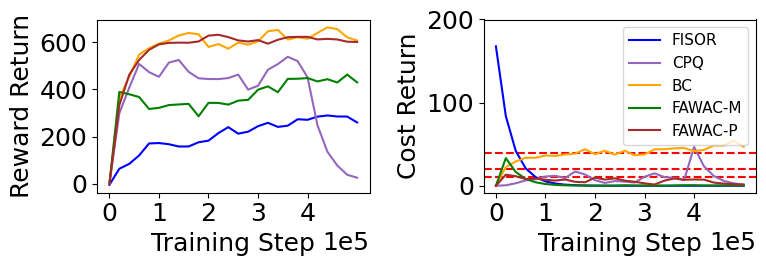

In [ ]:
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Define colors
colors = {
    'FISOR': 'blue',
    'CPQ': 'tab:purple',
    'BC': 'orange',
    'FAWAC-M': 'green',
    'FAWAC-P': 'brown',
}

for key in colors.keys():
    this_data = data[key]['reward']
    this_data = smooth_data(this_data)
    axs[0].plot(data[key]['step'], this_data, color=colors[key])

axs[0].set_xlabel('Training Step')
axs[0].set_ylabel('Reward Return')


axs[1].set_xlabel('Training Step')
axs[1].set_ylabel('Cost Return')

# Horizontal dashed lines at cost thresholds
axs[1].axhline(y=10, color='r', linestyle='--')
axs[1].axhline(y=20, color='r', linestyle='--')
axs[1].axhline(y=40, color='r', linestyle='--')

for key in colors.keys():
    this_data = data[key]['cost']
    this_data = smooth_data(this_data)
    axs[1].plot(data[key]['step'], this_data, label=f'{key.upper()}', color=colors[key])


axs[1].legend(loc='upper right', prop={'size': 11})


for ax in axs:
    ax.set_xticks([0, 1e5, 2e5, 3e5, 4e5])
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))


axs[0].set_yticks([0, 200, 400, 600])
axs[1].set_yticks([0, 100, 200])

plt.tight_layout() 
plt.savefig('fawac_pybullet_ball_circle_training.pdf')
plt.show()
